# Pandas ile Veri Analizi

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
df= pd.read_csv("kaggle_survey_2020_responses.csv", skiprows=[1])
del df['Time from Start to Finish (seconds)']
df.rename(inplace=True,columns={"Q1":"Age",'Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Occupation','Q6':'CodingExperience'})
nanLinesBefore=df.shape[0]
df=df.dropna(subset=["Education","Occupation","CodingExperience"])
nanLinesAfter=df.shape[0]
deletedLineNumbers=nanLinesBefore-nanLinesAfter
print(f"{deletedLineNumbers} tane satır silindi")
print(df.shape)

916 tane satır silindi
(19120, 354)


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

<AxesSubplot:ylabel='Age'>

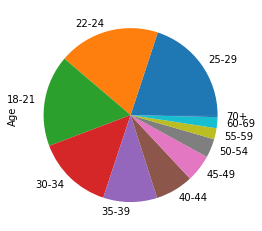

In [2]:
import matplotlib.pyplot as plt
df['Age'].value_counts().plot.pie()

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [3]:
df.groupby('Country').get_group('Turkey')['Education'].value_counts()

Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [4]:
Ages = df.Age.values
Ages = list(set(Ages))
for x in Ages:
    max = df.groupby('Age').get_group(x)['Occupation'].value_counts().idxmax()
    print(f"{x} yaş aralığında en çok yapılan meslek ismi {max}")


45-49 yaş aralığında en çok yapılan meslek ismi Other
22-24 yaş aralığında en çok yapılan meslek ismi Student
70+ yaş aralığında en çok yapılan meslek ismi Data Scientist
18-21 yaş aralığında en çok yapılan meslek ismi Student
25-29 yaş aralığında en çok yapılan meslek ismi Student
35-39 yaş aralığında en çok yapılan meslek ismi Data Scientist
40-44 yaş aralığında en çok yapılan meslek ismi Data Scientist
30-34 yaş aralığında en çok yapılan meslek ismi Data Scientist
50-54 yaş aralığında en çok yapılan meslek ismi Other
55-59 yaş aralığında en çok yapılan meslek ismi Other
60-69 yaş aralığında en çok yapılan meslek ismi Other


## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

<AxesSubplot:>

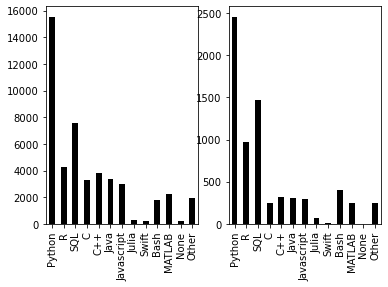

In [5]:
method1 = [x for x in df if x.startswith('Q7')]
dict1={}
for i in method1:
    dict1.update(df[i].value_counts())
sorted_dict1 = sorted(dict1.items() , key=lambda item: item[1], reverse=True)

dict2={}
for i in method1:
    dict2.update(df.groupby('Occupation').get_group('Data Scientist')[i].value_counts())
sorted_dict2 = sorted(dict2.items() , key=lambda item: item[1], reverse=True)
#print(sorted_dict2)
fig, axes = plt.subplots(1, 2)
data = pd.Series(dict1, index=dict1)
data2 = pd.Series(dict2, index=dict2)
data.plot.bar(ax=axes[0], color='k')
data2.plot.bar(ax=axes[1], color='k')

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

<AxesSubplot:xlabel='CodingExperience'>

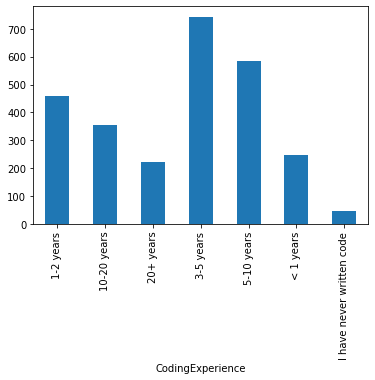

In [6]:
import pandas as pd
DataScientist = df[df.Occupation=='Data Scientist'].groupby('CodingExperience')['Q15']
DataScientist.size().plot(kind='bar',x='CodingExperience',y='Q15')

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [7]:
method3 = [x for x in df if x.startswith('Q17')]
dict3={}
for i in method3:
    dict3.update(df.groupby('Q16_Part_1')[i].value_counts())
sorted_dict3 = sorted(dict3.items() , key=lambda item: item[1], reverse=True)
print(dict3)

dataSTK=df.filter(items=['Q16_Part_1', 'Q16_Part_2','Q16_Part_3']).dropna().value_counts()
print('\n')
print(dataSTK)

{('  Scikit-learn ', 'Linear or Logistic Regression'): 8382, ('  Scikit-learn ', 'Decision Trees or Random Forests'): 7340, ('  Scikit-learn ', 'Gradient Boosting Machines (xgboost, lightgbm, etc)'): 4507, ('  Scikit-learn ', 'Bayesian Approaches'): 2886, ('  Scikit-learn ', 'Evolutionary Approaches'): 523, ('  Scikit-learn ', 'Dense Neural Networks (MLPs, etc)'): 2739, ('  Scikit-learn ', 'Convolutional Neural Networks'): 4679, ('  Scikit-learn ', 'Generative Adversarial Networks'): 792, ('  Scikit-learn ', 'Recurrent Neural Networks'): 2795, ('  Scikit-learn ', 'Transformer Networks (BERT, gpt-3, etc)'): 1064, ('  Scikit-learn ', 'None'): 211, ('  Scikit-learn ', 'Other'): 292}


Q16_Part_1       Q16_Part_2     Q16_Part_3
  Scikit-learn     TensorFlow    Keras        4406
dtype: int64


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [8]:
Q24list=df['Q24'].value_counts()
ab=df['Q24'].dropna().tolist()
newQ24=[]
for i in ab:
    index1=""
    index2=""
    x=i.find("-")
    if(x!=-1):
        for j in range(0,x):
            if(i[j]!="$" and i[j]!=","):
                index1+=i[j]
        for j in range(x+1,len(i)):
            if(i[j]!=","):
                index2+=i[j] 
        newIndex=(int(index2) - int(index1))/2
        newQ24.append(newIndex)
    else:
        y=i.find("$")
        for j in range(y+1,len(i)):
            if(i[j]!=","):
                index2+=i[j]
        newQ24.append(newIndex)

dfDrop=df.dropna(subset=["Q24"])
df=dfDrop.assign(ConvertedComp=pd.Series(newQ24))
df=df.dropna(subset=["ConvertedComp"])
means=df.groupby('Occupation')['ConvertedComp'].mean().sort_values(ascending=False)
means.idxmax()
print(f"Index of Data Scientist : {means.keys().tolist().index('Data Scientist')}")
df[df.Occupation=='Data Scientist'].groupby('Country')['ConvertedComp'].mean().sort_values(ascending=True).head(10)
df[(df.Q20=='250-999 employees')|(df.Q20=='1000-9,999 employees')|(df.Q20=='10,000 or more employees')].ConvertedComp.mean()
pilot = df.groupby('Country')['ConvertedComp'].agg(['mean','std','median'])
indexTr = pilot.index.tolist().index('Turkey')
print(f"Turkey index is : {indexTr}")
pilot[pilot.index=='Turkey']

Index of Data Scientist : 4
Turkey index is : 49


,mean,std,median
Country,,,
Turkey,5287.0,6636.361764,2499.5


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

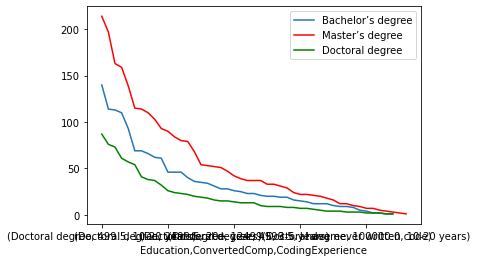

In [9]:
ax = plt.gca()
dataEducation = df.filter(items=['Education','ConvertedComp','CodingExperience'])
dataEducation[(dataEducation.Education=='Bachelor’s degree')].value_counts().plot.line(subplots=True,x='CodingExperience',y='ConvertedComp',ax=ax)
dataEducation[(dataEducation.Education=='Master’s degree')].value_counts().plot.line(subplots=True,x='CodingExperience',y='ConvertedComp',color="red",ax=ax)
dataEducation[(dataEducation.Education=='Doctoral degree')].value_counts().plot.line(subplots=True,x='CodingExperience',y='ConvertedComp',color="green",ax=ax)
plt.legend(['Bachelor’s degree','Master’s degree','Doctoral degree'])

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

Student                      0.240766
Statistician                 0.237931
Data Analyst                 0.235932
Currently not employed       0.227603
Research Scientist           0.203578
Business Analyst             0.195489
Other                        0.168106
Data Scientist               0.163677
Data Engineer                0.137300
Software Engineer            0.132114
DBA/Database Engineer        0.128000
Machine Learning Engineer    0.125693
Product/Project Manager      0.112717
Name: Occupation, dtype: float64


Şu anda çalışmayan kadın oranı : 0.09695719443011862
Şu anda çalışmayan erkek oranı : 0.07821901323706378


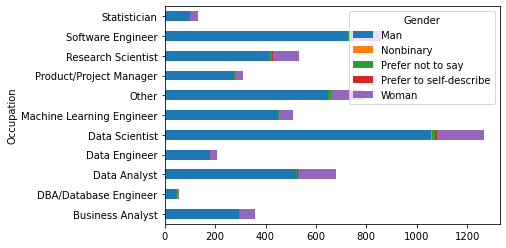

In [10]:
occupation_gender = df.groupby(['Occupation', 'Gender'])
occupation_gender.size().unstack().plot(kind='barh', stacked=True)

#Currently not employed verisi 0 çıktığı için filterelenmemiş şekilde veri setini tekrar okuttum
dataf1= pd.read_csv("kaggle_survey_2020_responses.csv", skiprows=[1])
del dataf1['Time from Start to Finish (seconds)']
dataf1.rename(inplace=True,columns={"Q1":"Age",'Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Occupation','Q6':'CodingExperience'})

total = dataf1.Occupation.value_counts()
women = dataf1[dataf1.Gender=='Woman'].Occupation.value_counts()
percentage = women/total
print(percentage.sort_values(ascending=False))
print("\n")
totalwomen2=len(dataf1[dataf1.Gender=='Woman'])
totalmen=len(dataf1[dataf1.Gender=='Man'])
women2 = dataf1[(dataf1.Occupation=='Currently not employed')&(dataf1.Gender=='Woman')].Gender.count()
men = dataf1[(dataf1.Occupation=='Currently not employed')&(dataf1.Gender=='Man')].Gender.count()
percentageWomen = women2/totalwomen2
print(f"Şu anda çalışmayan kadın oranı : {percentageWomen}")
percentageMen = men/totalmen
print(f"Şu anda çalışmayan erkek oranı : {percentageMen}")

### Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

India    480
Name: Country, dtype: int64


<AxesSubplot:ylabel='Education'>

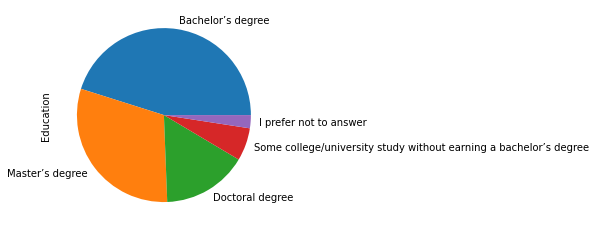

In [11]:
maxWoman=dataf1[(dataf1.Gender=='Woman')&((dataf1.CodingExperience=='3-5 years')|(dataf1.CodingExperience=='5-10 years')|(dataf1.CodingExperience=='10-20 years')|(dataf1.CodingExperience=='20+ years'))].Country.value_counts()
print(maxWoman.head(1))
dataf1[dataf1.Country=='Turkey'].groupby('Gender').get_group('Woman').Education.value_counts().plot(kind="pie")

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [12]:
method5 = [x for x in df if x.startswith('Q39')]
keys = []
dictY={}
for i in method5:
    dictY.update(df[i].value_counts())
for j in dictY.keys():
    change = ""
    index = j.find("(")
    for k in range(index,len(j)):
        change += j[k]
    keys.append(j[:index])

values = dictY.values()
dictX = dict(zip(keys,values))
print(dictX)
dictGender = {}
for i in method5:
    dictGender.update(df.groupby('Age').get_group('18-21')[i].value_counts())
sorted_dictGender = sorted(dictGender.items() , key=lambda item: item[1], reverse=True)
sorted_dictGender[0]

{'Twitter ': 1128, 'Email newsletters ': 1064, 'Reddit ': 794, 'Kaggle ': 3002, 'Course Forums ': 818, 'YouTube ': 2542, 'Podcasts ': 633, 'Blogs ': 2473, 'Journal Publications ': 1083, 'Slack Communities ': 617, 'Non': 231, 'Othe': 182}


('Kaggle (notebooks, forums, etc)', 129)

## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [13]:
import pandas as pd
country_info = pd.read_csv('countryInfo.csv',sep='\t+',skiprows=[i for i in range(0,49)],index_col='Country')
country_info = country_info.filter(items=['"#ISO','Country','neighbours'])
country_info.rename(inplace=True,columns={'"#ISO':'CountryCode'})
merged_survey = pd.merge(left=country_info, right=df,left_on='Country',right_on='Country')
merged_survey

<ipython-input-13-f3de5d767eb1>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  country_info = pd.read_csv('countryInfo.csv',sep='\t+',skiprows=[i for i in range(0,49)],index_col='Country')


,Country,CountryCode,neighbours,Age,Gender,Education,Occupation,CodingExperience,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp
0,United Arab Emirates,"""AE",None,30-34,Man,Master’s degree,Research Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2499.5
1,United Arab Emirates,"""AE",None,40-44,Man,Professional degree,Other,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
2,United Arab Emirates,"""AE",None,30-34,Man,Doctoral degree,Product/Project Manager,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12499.5
3,United Arab Emirates,"""AE",None,25-29,Man,Bachelor’s degree,Other,< 1 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
4,United Arab Emirates,"""AE",None,30-34,Man,Master’s degree,Software Engineer,< 1 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,Polyaxon,Trains,NaN,NaN,NaN,499.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,South Africa,"""ZA","ZW,SZ,MZ,BW,NA,LS",35-39,Man,Master’s degree,Product/Project Manager,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
4171,South Africa,"""ZA","ZW,SZ,MZ,BW,NA,LS",35-39,Man,Bachelor’s degree,Business Analyst,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,499.5
4172,South Africa,"""ZA","ZW,SZ,MZ,BW,NA,LS",55-59,Man,Master’s degree,Data Engineer,1-2 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5
4173,South Africa,"""ZA","ZW,SZ,MZ,BW,NA,LS",40-44,Man,Master’s degree,Research Scientist,20+ years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999.5


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [14]:
CountryCode=merged_survey[merged_survey.Country=='Germany'].neighbours.value_counts()
CountryCode
normal=merged_survey[(merged_survey.CountryCode=='"CH')|(merged_survey.CountryCode=='"PL')|(merged_survey.CountryCode=='"NL')|(merged_survey.CountryCode=='"DK')|(merged_survey.CountryCode=='"BE')|(merged_survey.CountryCode=='"CZ')|(merged_survey.CountryCode=='"LU')|(merged_survey.CountryCode=='"FR')|(merged_survey.CountryCode=='"AT')|(merged_survey.CountryCode=='"DE')].groupby('Country').Education.count()
doctoral=merged_survey[(merged_survey.CountryCode=='"CH')|(merged_survey.CountryCode=='"PL')|(merged_survey.CountryCode=='"NL')|(merged_survey.CountryCode=='"DK')|(merged_survey.CountryCode=='"BE')|(merged_survey.CountryCode=='"CZ')|(merged_survey.CountryCode=='"LU')|(merged_survey.CountryCode=='"FR')|(merged_survey.CountryCode=='"AT')|(merged_survey.CountryCode=='"DE')].groupby('Education').get_group('Doctoral degree').Country.value_counts()
perc=(doctoral*100)/normal
sorted(perc.items() , key=lambda item: item[0], reverse=False)

[('Belgium', 30.76923076923077),
 ('France', 26.53061224489796),
 ('Germany', 37.2093023255814),
 ('Netherlands', 16.666666666666668),
 ('Poland', 20.0),
 ('Switzerland', 37.93103448275862)]